The following code will create a RESTful API caller for a LangChain OpenAI text summarizer using FastAPI.

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware

In [38]:
from pydantic import BaseModel

In [15]:
from langchain import OpenAI, PromptTemplate
from langchain.chains import LLMChain
from langchain.llms import GPT4All
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

Middleware is a layer which intercepts code before it reaches the main app. This is a specific layer to manage CORS requests (it is a type of HTTP request that requests resources from another domain). The CORS mechanism allows it to guarantee safety in Cross-Origin Resources.  

In [5]:
app = FastAPI()
app.add_middleware(
    CORSMiddleware, 
    allow_origins=['*'], # allows all origins
    allow_methods=['*'], # allows all methods (eg. GET, PUT, POST, DELETE)
    allow_headers=['*'], # allows all headers
)

In [17]:
langchain_llm = OpenAI(temperature=0)

summarize_template_string = """
        Provide a summary for the following text:
        {text}
"""

summarize_prompt = PromptTemplate(
    template=summarize_template_string,
    input_variables=['text'],
)

In [18]:
summarize_chain = LLMChain(
    llm=langchain_llm,
    prompt=summarize_prompt,
)

In [60]:
class SummarizeRequest(BaseModel):
    text: str

@app.post('/summarize-text')
async def summarize_text(request: SummarizeRequest):
    summary = summarize_chain.run(text=request.text)
    return {'summary': summary}

Now we run the code on terminal  
*uvicorn scripts.LLM_apify:app --port 80*  
This sets up the port to which we will send requests to

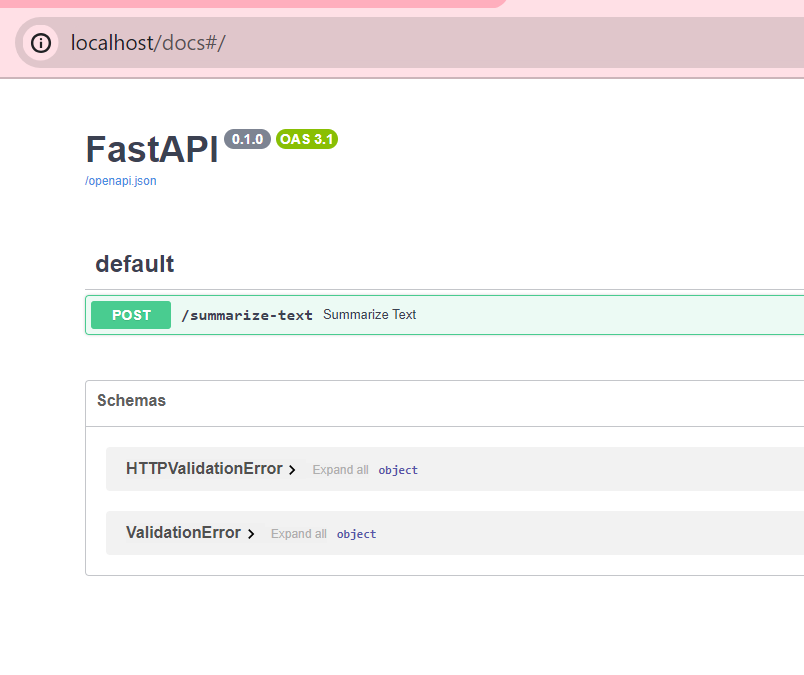

Then in port 80/docs we find the automatic documentation that FastAPI creates for us

We can also post examples, using the "Try it out" button.

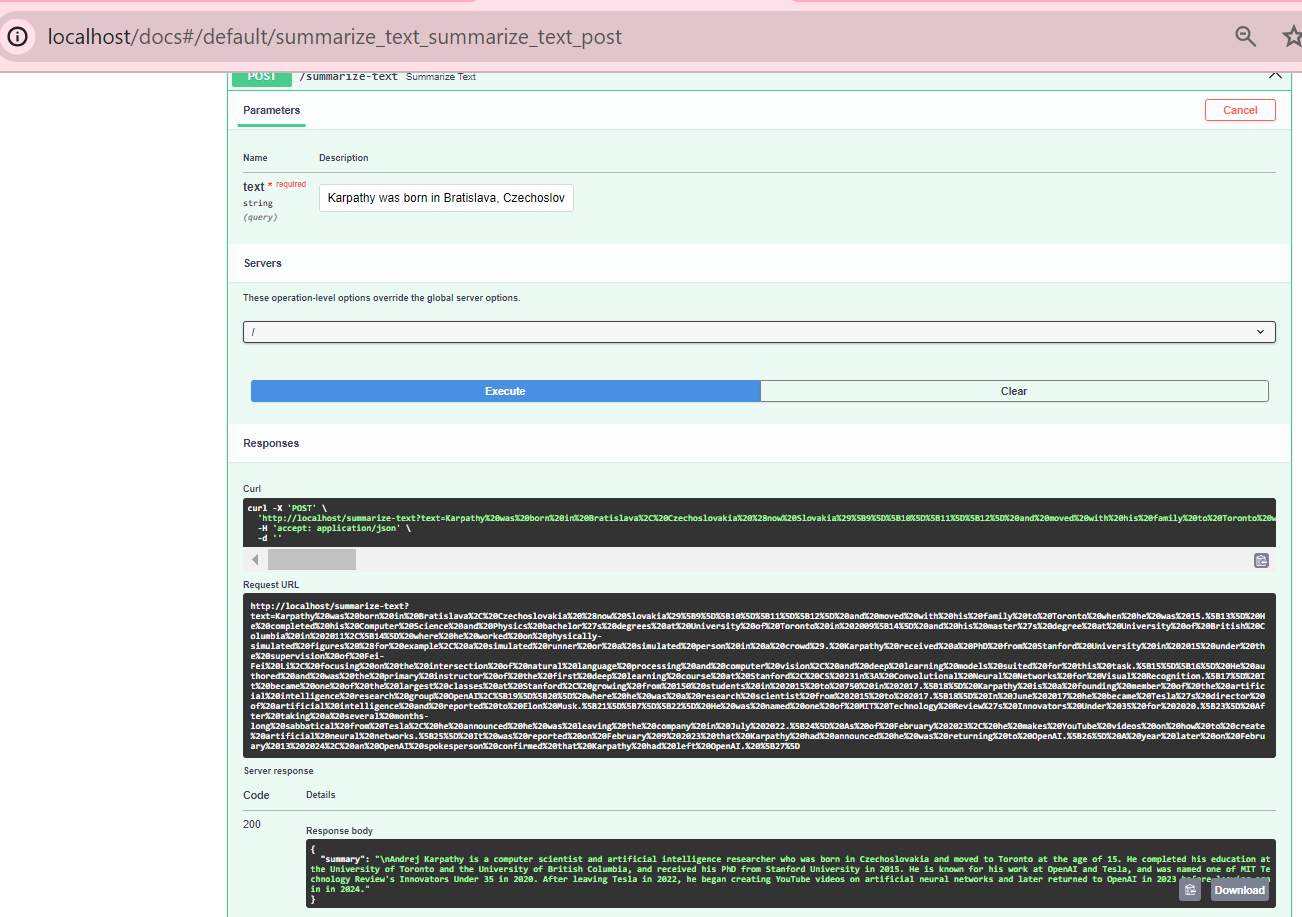

Which returns  
*{
  "summary": "\nAndrej Karpathy is a computer scientist and artificial intelligence researcher who was born in Czechoslovakia and moved to Toronto at the age of 15. He completed his education at the University of Toronto and the University of British Columbia, and received his PhD from Stanford University in 2015. He is known for his work at OpenAI and Tesla, and was named one of MIT Technology Review's Innovators Under 35 in 2020. After leaving Tesla in 2022, he began creating YouTube videos on artificial neural networks and later returned to OpenAI in 2023 before leaving again in 2024."
}*